In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [3]:
data_frame =pd.read_csv('insurance.csv')
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data_frame['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

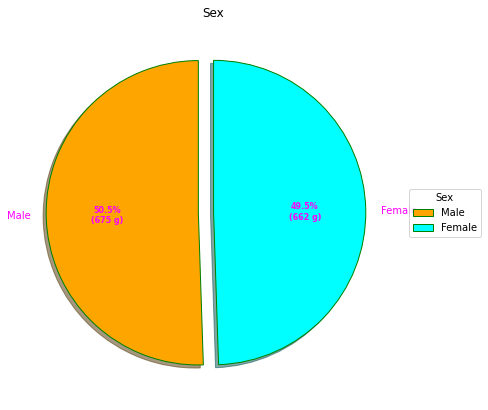

In [5]:
fig, ax = plt.subplots(figsize =(10, 7))

sex=['Male','Female']

data=list(data_frame['sex'].value_counts().values)

explode=(0.1, 0.0)
colors = ("orange", "cyan")
wp = {'linewidth' : 1, 'edgecolor' : "green"}

def func(pct, allvalues):
  absolute = int(pct/100*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

wedges,texts,autotexts = ax.pie(data,
                                autopct = lambda pct : func(pct,data),
                                explode = explode,
                                labels = sex,
                                shadow = True,
                                colors = colors,
                                startangle = 90,
                                wedgeprops = wp,
                                textprops = dict(color='magenta'))

ax.legend(wedges,sex,
          title="Sex",
          loc = "center left",
          bbox_to_anchor =(1,0,0.5,1))

plt.setp(autotexts, size = 8, weight = "bold")
ax.set_title("Sex")
plt.show()

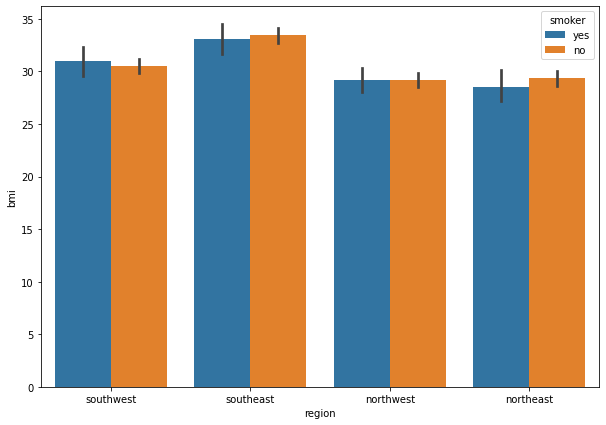

In [6]:
plt.figure(figsize=(10,7))
sb.barplot(x="region",y="bmi",hue="smoker",data=data_frame)

In [7]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  data_frame[column_name] = label_encoder.fit_transform(data_frame[column_name])

In [8]:
label_encoding("smoker")
label_encoding("sex")

In [9]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [10]:
one_hot = pd.get_dummies(data_frame['region'])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [11]:
data_frame = pd.concat([data_frame, one_hot],axis = 1)
data_frame.drop('region',axis = 1, inplace = True)
data_frame.head() #We use this code because we want to see our data(whether all of them are numerical or not)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [12]:
X = data_frame.drop('charges',axis=1)
y=data_frame['charges']

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [15]:
print(f"""
Shape of X Train: {X_train.shape}
Shape of y Train: {y_train.shape}
Shape of X Test: {X_test.shape}
Shape of Y Test: {y_test.shape}
""")


Shape of X Train: (1070, 9)
Shape of y Train: (1070,)
Shape of X Test: (268, 9)
Shape of Y Test: (268,)



In [16]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()

In [17]:
linreg_scores = cross_val_score(linreg,
                                X_train,y_train,
                                scoring = "neg_mean_squared_error",
                                cv=10)

In [18]:
linreg_scores

array([-36935397.24633981, -43307871.90469339, -27392943.33594101,
       -36545076.53517248, -34064321.21101744, -37545462.85261907,
       -53003844.65025207, -39666927.56171686, -38357145.09175086,
       -32042446.75311643])

In [19]:
DecTree_scores = cross_val_score(DecTree,
                                 X_train,y_train,
                                 scoring = "neg_mean_squared_error",
                                 cv=10)

In [20]:
RandForest_scores = cross_val_score(RandForest,
                                    X_train,y_train,
                                    scoring = "neg_mean_squared_error",
                                    cv=10)

In [21]:
SVM_scores = cross_val_score(SVM,
                             X_train,y_train,
                             scoring = "neg_mean_squared_error",
                             cv=10)

In [22]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores : {scores}
  Mean : {scores.mean()} 
  Standart Deviation : {scores.std()}
  """)

In [23]:
score_display(linreg_scores)


  RMSE Scores : [6077.44989665 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7280.37393616 6298.16858791 6193.3145481  5660.60480453]
  Mean : 6133.376271799343 
  Standart Deviation : 517.5318567882914
  


In [24]:
score_display(DecTree_scores)


  RMSE Scores : [6244.65309552 6487.51317377 6542.66813815 7096.22128223 7053.54908015
 5956.46540498 7455.29780398 7203.99365331 6307.12047966 5694.77705438]
  Mean : 6604.22591661171 
  Standart Deviation : 548.6038491255244
  


In [25]:
score_display(SVM_scores)


  RMSE Scores : [12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757]
  Mean : 12541.318099949585 
  Standart Deviation : 951.4602172803403
  


In [26]:
params = {"n_estimators": [3,10,20,50],
          "n_jobs": [2,3,4,10]}

In [28]:
grid_s = GridSearchCV(RandForest,params,
                      cv=5,
                      scoring="neg_mean_squared_error")

In [29]:
grid_s.fit(X_train,y_train);

In [30]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 3}

In [31]:
for mean_score,parameters in zip((grid_s.cv_results_['mean_test_score']),
                                 (grid_s.cv_results_['params'])):
    print(np.sqrt(-mean_score),'    ',params);

5502.561227314467      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5766.259533354672      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5565.226097328687      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5620.061716451058      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5151.416874859859      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5052.111168619421      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5112.636814854469      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5103.351888104483      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5003.876553984335      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5048.774053213789      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
5014.104537909251      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
4989.862312317559      {'n_estimators': [3, 10, 20, 50], 'n_jobs': [2, 3, 4, 10]}
4969.62612607169

In [32]:
predictions = grid_s.best_estimator_.predict(X_test)

In [33]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [34]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                           "Predictions" : predictions[0:10]})
comparison

,Y Test,Predictions
0,9095.06825,10150.256914
1,5272.17580,4927.232938
2,29330.98315,28513.559056
3,9301.89355,11815.558134
4,33750.29180,34681.001228
5,4536.25900,10123.080229
6,2117.33885,2094.776547
7,14210.53595,14508.327672
8,3732.62510,5918.316138
9,10264.44210,12234.007638


In [35]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test,preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test,preds)
  mae = mean_absolute_error(y_test,preds)

  print(f"Mean absolute error: {mae} \nMean Squared Error: {mse}, \nRoot Mean Squared error:{rmse}")

In [36]:
regression_evaluation(predictions)

Mean absolute error: 2492.824778073942 
Mean Squared Error: 21342832.262247417, 
Root Mean Squared error:4619.830328296421


In [37]:
from scipy import stats

confidence = 0.95
squared_errors = (predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,
loc = squared_errors.mean(),
scale = stats.sem(squared_errors)))

array([3678.75978822, 5399.29541191])